# Introduction to Portfolio Theory: Risk Measures #

After studying benchmarks, Nancy concluded that she was somewhat fortunate to have chosen Nvidia stock as her first investment. Now, she wants to invest in an ETF because she believes it can help her maintain a medium-to-long-term investment strategy, as she is not ready for daily trading. Nancy wants to be more careful when choosing an ETF, so she compares three ETFs (SPY, IWY, and SPXL) and their risks.

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import norm

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data

In [2]:
tickers = get_tickers(mod="1.3")

tickers

['SPY', 'IYW', 'SPXL']

In [3]:
# DataFrame to store everything
data = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2010-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    data = pd.concat([data, returns], axis=1)
    
    print(f'Data Ready for {ticker}')

Data Ready for SPY
Data Ready for IYW
Data Ready for SPXL


In [4]:
data

,SPY,IYW,SPXL
2010-01-05 00:00:00,0.002644,-0.001540,0.009376
2010-01-06 00:00:00,0.000704,-0.007045,0.002688
2010-01-07 00:00:00,0.004212,-0.003801,0.011744
2010-01-08 00:00:00,0.003322,0.007587,0.010558
2010-01-11 00:00:00,0.001396,-0.004822,0.003844
...,...,...,...
2024-12-24 00:00:00,0.011054,0.010028,0.030746
2024-12-26 00:00:00,0.000067,0.000363,0.000055
2024-12-27 00:00:00,-0.010582,-0.014983,-0.032044
2024-12-30 00:00:00,-0.011477,-0.012101,-0.035386


The conceptual foundations and formulas of the forward concepts are presented in Section 2 of this module’s PDF. We highly recommend reading them before continuing with this notebook.

In [5]:
# 1. Annualized Volatility (Standard Deviation)
volatility = data.std() * np.sqrt(252)

print("Annualized Volatility:\n")
print(volatility)

Annualized Volatility:

SPY     0.171008
IYW     0.222889
SPXL    0.519193
dtype: float64


In [6]:
# 1.5 Annualized Variance (Standard Deviation)
variance = data.var() * 252

print("Annualized Variance:\n")
print(variance)

Annualized Variance:

SPY     0.029244
IYW     0.049680
SPXL    0.269561
dtype: float64


In [7]:
# 2. Value at Risk
confidence_level = 0.95

z_score = norm.ppf(1 - confidence_level)

VaR_95 = data.mean() + z_score * data.std()
VaR_95 = VaR_95 * np.sqrt(252)  # Annualized

print("Annualized Value at Risk (VaR) at 95% confidence level:\n")
print(VaR_95)

Annualized Value at Risk (VaR) at 95% confidence level:

SPY    -0.273209
IYW    -0.356075
SPXL   -0.838372
dtype: float64


In [15]:
# Download the Benchmark
benchmark = pd.read_csv(r'..\additional_data\benchmark_returns.csv')
benchmark.set_index('Date', inplace=True)
benchmark.index = pd.to_datetime(benchmark.index)
benchmark = benchmark.loc['2010-01-01':]

benchmark

,benchmark_returns
Date,
2010-01-04,0.015916
2010-01-05,0.003111
2010-01-06,0.000545
2010-01-07,0.003993
2010-01-08,0.002878
...,...
2024-12-24,0.010982
2024-12-26,-0.000406
2024-12-27,-0.011117


In [16]:
# Calculate the benchmark returns
benchmark_rets = benchmark['benchmark_returns']

In [18]:
# Calculate the Excess Returns
excess_return = data.subtract(benchmark_rets.squeeze(), axis=0)
excess_return.dropna()

excess_return

,SPY,IYW,SPXL
2010-01-04 00:00:00,NaN,NaN,NaN
2010-01-05 00:00:00,-0.000467,-0.004651,0.006265
2010-01-06 00:00:00,0.000158,-0.007590,0.002143
2010-01-07 00:00:00,0.000219,-0.007794,0.007751
2010-01-08 00:00:00,0.000445,0.004710,0.007680
...,...,...,...
2024-12-24 00:00:00,0.000071,-0.000954,0.019764
2024-12-26 00:00:00,0.000472,0.000769,0.000461
2024-12-27 00:00:00,0.000535,-0.003865,-0.020926
2024-12-30 00:00:00,-0.000718,-0.001341,-0.024627


In [19]:
# 3. Tracking Error (which is the Std of the Excess Returns)
tracking_error = excess_return.std() * np.sqrt(252)

print("\nTracking Error:")
print(tracking_error)


Tracking Error:
SPY     0.008943
IYW     0.097386
SPXL    0.346975
dtype: float64


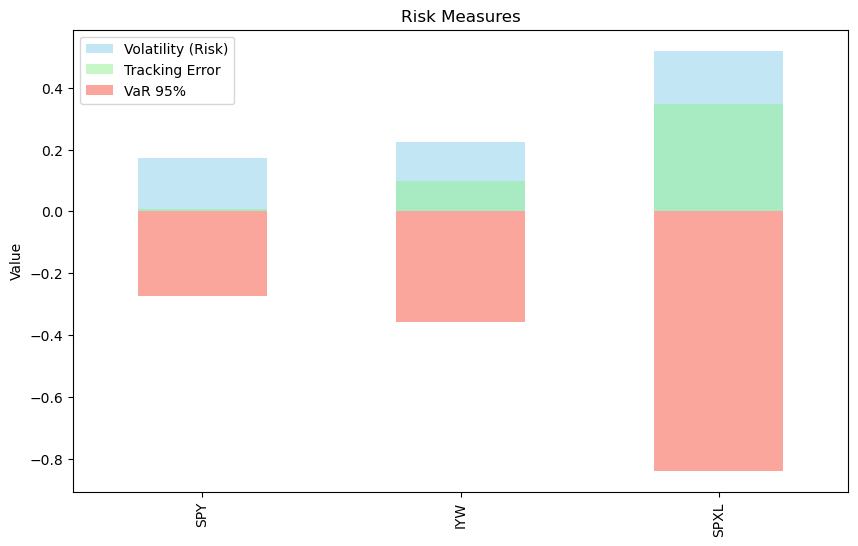

In [20]:
#Let us visualize the Risk Measures
fig, ax = plt.subplots(figsize=(10, 6))
volatility.plot(kind='bar', color='skyblue', label='Volatility (Risk)', alpha=0.5)
tracking_error.plot(kind='bar', color='lightgreen', label='Tracking Error', alpha=0.5)
VaR_95.plot(kind='bar', color='salmon', label='VaR 95%', alpha=0.7)
plt.title('Risk Measures')
plt.ylabel('Value')
plt.legend()
plt.show()

In [21]:
# Naturally, the SPXL is more risky that the other ETFs
mean = data.mean() * 252

print("Annualized Mean Returns:")
print(mean)

Annualized Mean Returns:
SPY     0.128157
IYW     0.167408
SPXL    0.248033
dtype: float64


In [22]:
# Risk Adjusted Returns
eff_ratio = mean/volatility

print("Risk Adjusted Returns:")
print(eff_ratio)

Risk Adjusted Returns:
SPY     0.749426
IYW     0.751081
SPXL    0.477729
dtype: float64


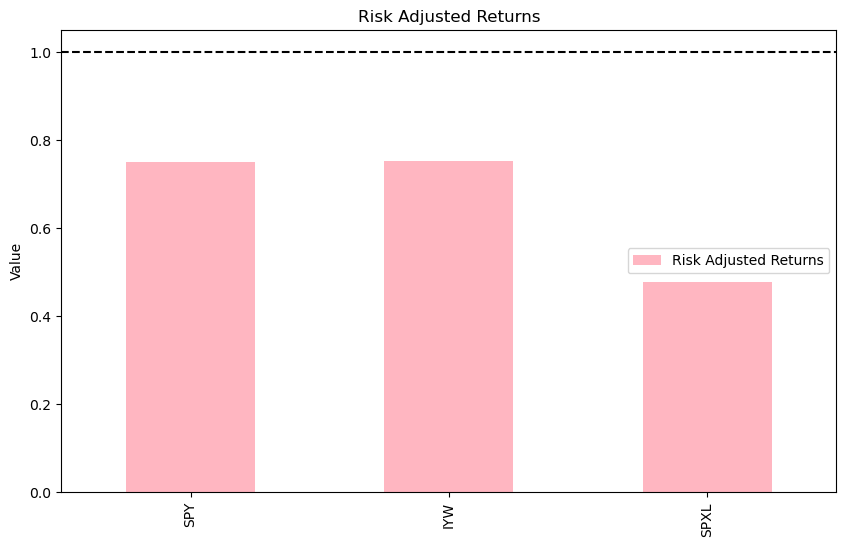

In [23]:
#Let us visualize
fig, ax = plt.subplots(figsize=(10, 6))
eff_ratio.plot(kind='bar', color='lightpink', label='Risk Adjusted Returns')
ax.axhline(y=1, color='black', linestyle='--')
plt.title('Risk Adjusted Returns')
plt.ylabel('Value')
plt.legend()
plt.show()

In [24]:
# Calculate the Risk Adjusted Returns of the Benchmark (Risk Aversion Coefficient)
mean_bench = benchmark_rets.mean() * 252
var_bench = benchmark_rets.var() * 252
eff_rate_bench = mean_bench/var_bench

eff_rate_bench

3.7153956110430015

### Using Prices ###

In [33]:
# price data
close_prices = pd.DataFrame()
open_prices = pd.DataFrame()
high_prices = pd.DataFrame()
low_prices = pd.DataFrame()

for ticker in tickers:
    df = get_market_data(
        ticker=ticker, 
        start_date='2010-01-01', 
        end_date='2025-01-01', 
        returns=False
    )
    
    open = df['open'].rename(ticker)
    close = df['close'].rename(ticker)
    high = df['high'].rename(ticker)
    low = df['low'].rename(ticker)
    
    open_prices = pd.concat([close_prices, open], axis=1)
    close_prices = pd.concat([close_prices, close], axis=1)
    high_prices = pd.concat([high_prices, high], axis=1)
    low_prices = pd.concat([low_prices, low], axis=1)
    
    print(f'Data Ready for {ticker}')

Data Ready for SPY
Data Ready for IYW
Data Ready for SPXL


In [34]:
high_prices

,SPY,IYW,SPXL
2010-01-04 00:00:00,85.560897,13.029586,4.093158
2010-01-05 00:00:00,85.779751,13.029581,4.127212
2010-01-06 00:00:00,86.013640,13.016253,4.162745
2010-01-07 00:00:00,86.270198,12.880715,4.198281
2010-01-08 00:00:00,86.489025,12.938482,4.234556
...,...,...,...
2024-12-24 00:00:00,597.769293,165.208430,181.507156
2024-12-26 00:00:00,598.902533,165.777831,182.540083
2024-12-27 00:00:00,594.230439,164.249431,178.110420
2024-12-30 00:00:00,588.226291,162.221519,172.618014


In [35]:
low_prices

,SPY,IYW,SPXL
2010-01-04 00:00:00,84.142305,12.878492,3.988774
2010-01-05 00:00:00,85.153454,12.902929,4.034674
2010-01-06 00:00:00,85.591081,12.858493,4.103521
2010-01-07 00:00:00,85.402439,12.776283,4.074650
2010-01-08 00:00:00,85.764637,12.769613,4.124990
...,...,...,...
2024-12-24 00:00:00,591.934094,163.849840,176.362391
2024-12-26 00:00:00,594.528696,164.109566,178.587155
2024-12-27 00:00:00,587.252104,161.152657,171.763878
2024-12-30 00:00:00,580.939799,159.534308,166.162219


In [38]:
# 4. Range
range = high_prices - low_prices

range

,SPY,IYW,SPXL
2010-01-04 00:00:00,1.418593,0.151093,0.104384
2010-01-05 00:00:00,0.626296,0.126652,0.092538
2010-01-06 00:00:00,0.422558,0.157760,0.059224
2010-01-07 00:00:00,0.867759,0.104432,0.123631
2010-01-08 00:00:00,0.724388,0.168869,0.109566
...,...,...,...
2024-12-24 00:00:00,5.835200,1.358590,5.144765
2024-12-26 00:00:00,4.373837,1.668266,3.952929
2024-12-27 00:00:00,6.978335,3.096775,6.346542
2024-12-30 00:00:00,7.286492,2.687212,6.455794


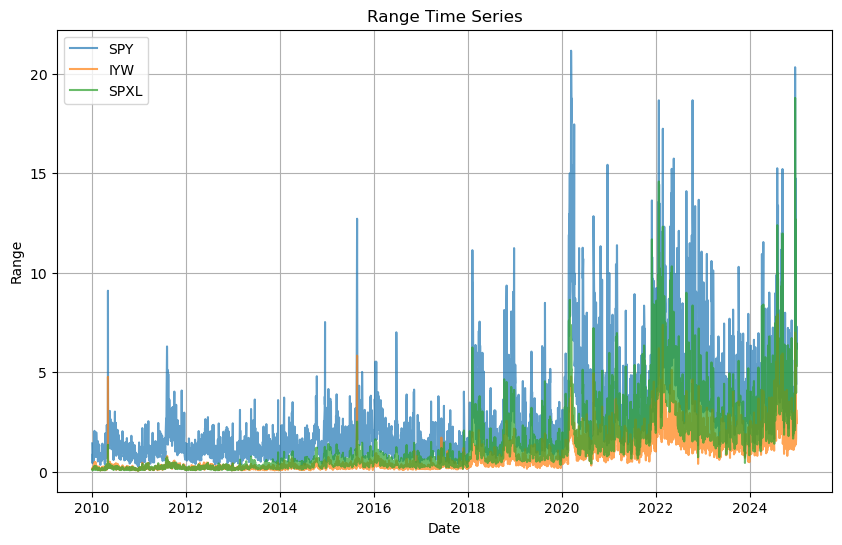

In [39]:
# Time Series Graphs for Cumulative Simple Returns and Log
plt.figure(figsize=(10, 6))
plt.plot(range, label=range.columns, alpha=0.7)

# Config
plt.title('Range Time Series')
plt.xlabel('Date')
plt.ylabel('Range')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [46]:
# 5. Maximum Drawdown (MDD)
cum_max = close_prices.cummax()

# Calculate
drawdowns = (close_prices - cum_max) / cum_max

# Maximum Drawdown
max_drawdown = drawdowns.min()
max_drawdown.name = 'Maximum Drowdawn'

max_drawdown * 100

SPY    -33.717280
IYW    -39.436180
SPXL   -76.856124
Name: Maximum Drowdawn, dtype: float64